# Week-12: **How to go Viral on Web**

## Module-1: Programming illustration - Small world networks

Covers...
* How to make a small world network?
     How to model i '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''/
* How a Myopic Search works?

How do we make a small world network?
> * In 2D space.. with a set of nodes, the connection decided on
    * **Homophily**: The nodes which are graphically closer (all the square blocks) -- comes edges and diagonals
    * **Weak ties**: (what makes th network smaller).. random longer connections<br/>
    ![](resources/2D-graph.png)<br/>
> * In 1D, nodes are circularly arranged.
    * Because of **homophily**, connected like ![](resources/1D-structure.png) -- repeat the process for each node. ![](resources/1D-final-strucrture.png)
    * For **Weak ties** -- did **Re-Wiring**, remove an edge randomly and place the edge randomly. Like ![](resources/rewiring.png). But instead of deleting and adding, just adding a few edges, as for a large network, that doesn't matter much.
    
**What's the Diameter of the network** _(as per the above ring network..)_
> * No. of nodes = 12, Radius = 6
> **With how many hops can you reach from start of semi-circle to end of semi-circle..??**
> > 3
> > The additin of ***Random long edges*** reduces the diameter --- as we count the hops... right. Hence the more the wiring the less the diameter.

Looking it graphically..<br/>
![](resources/graph-addition-of-nodes.png).. Think in-terms of big numbers. If had 1Million nodes, addition of 2-3 edges, doesn't make much difference.

**How do you define the Diameter..??**\
> **Longest Shortest distance** -- i.e., _Shortest_, refer -- still some cloudy... get clarified<br/>
![](resources/what-is-diameter.png)

    

https://youtu.be/jHgNv8_qhcs***
Our task is going to be...
* We're given a network, and should make it small world network, by adding some edges.
* Take a plot on, as the diameter gets varied as we increase the rewired-edges(weak-ties).

In [1]:
## Module-2: **Base Code**

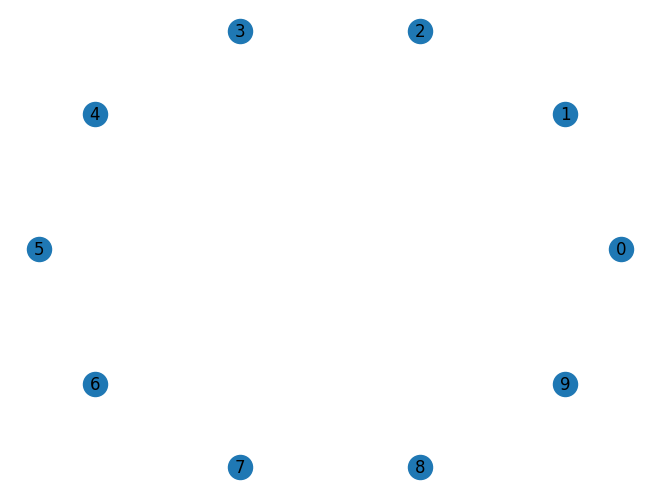

In [2]:
# Import the required libraries..
import networkx as nx            # for working with the graphs
import matplotlib.pyplot as plt  # For visualizing the graph..

# Create a graph..
G = nx.Graph()
# Add some nodes to it..
G.add_nodes_from(range(0, 10))
# Look at the graph..
nx.draw(G, nx.circular_layout(G), with_labels=True, )
plt.show()

## Module-3: **Making homophily based edges**

For each node, connect to two nodes left and two nodes to right

In [3]:
# logic adopted from "Abhishek Mohite" --- commmented on the lecture's video

def add_homophily_nodes(G):
    n = len(G.nodes())
    for idx in range(len(G.nodes())):
        G.add_edge(idx%n, (idx+1)%n);   #print(idx%n, (idx+1)%n, end=", ")
        G.add_edge(idx%n, (idx+2)%n);   #print((idx+2)%n)
    return G

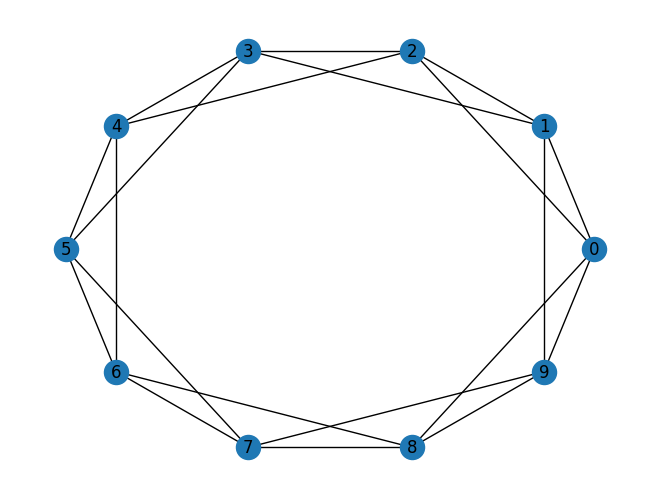

In [4]:
# -----------HOMOPHILY-------------------
G = add_homophily_nodes(G)
nx.draw(G, nx.circular_layout(G), with_labels=True)
plt.show()

In [5]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 8), (0, 9), (1, 2), (1, 3), (1, 9), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9)])

## Module-4: **Adding weak ties**

In [65]:
import random
def add_weak_ties(G, num_iterations):
    for i in range(num_iterations):
        v1 = random.choice(list(G.nodes()))
        v2 = random.choice(list(G.nodes()))
        while v1 == v2:                              # Go, as long as you gethttps://youtu.be/jHgNv8_qhcs the same nodes
            v1 = random.choice(list(G.nodes()))
            v2 = random.choice(list(G.nodes()))
            G.add_edge(v1, v2)                       # If already exists an edge b/w, v1 and v2, this doesn't seems to be affected
    return G

In [7]:
import random
random.choice(list(G.nodes()))

1

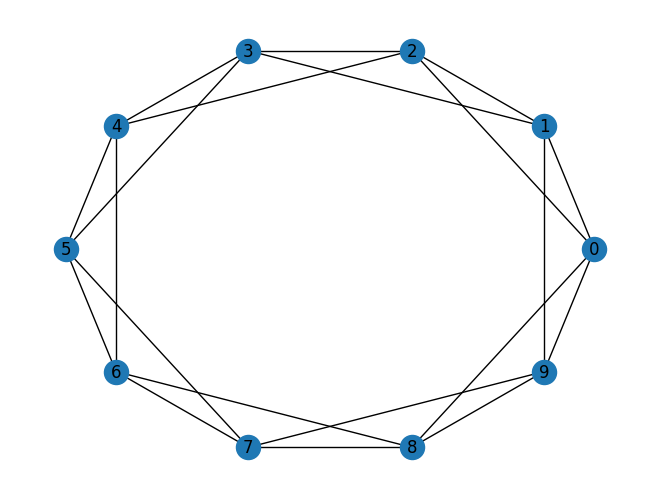

In [8]:
G = add_weak_ties(G, num_iterations=15)
nx.draw(G, nx.circular_layout(G), with_labels=True)
plt.show()

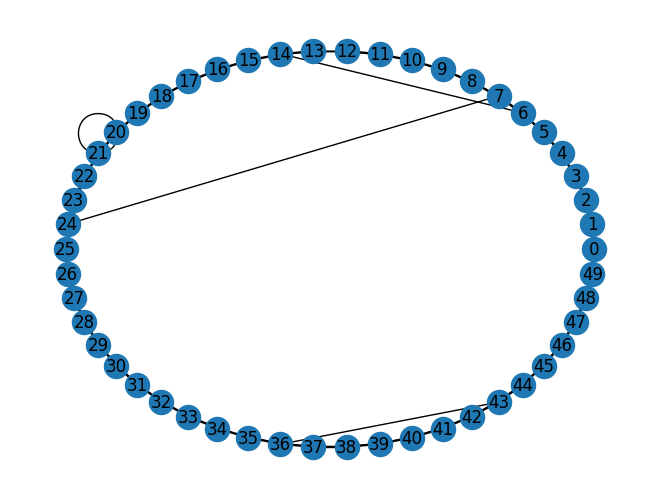

In [66]:
# Import the required libraries..
import networkx as nx            # for working with the graphs
import matplotlib.pyplot as plt  # For visualizing the graph..

# Create a graph..
G = nx.Graph()
# Add some nodes to it..
G.add_nodes_from(range(50))

# -----------HOMOPHILY-------------------
add_homophily_nodes(G)

# -------------Weak ties -----------------
G = add_weak_ties(G, 100)

# Look at the graph..
nx.draw(G, nx.circular_layout(G), with_labels=True, )
plt.show()

## Module-5: **Plotting change in diameter**

In [10]:
nx.diameter(G)

13

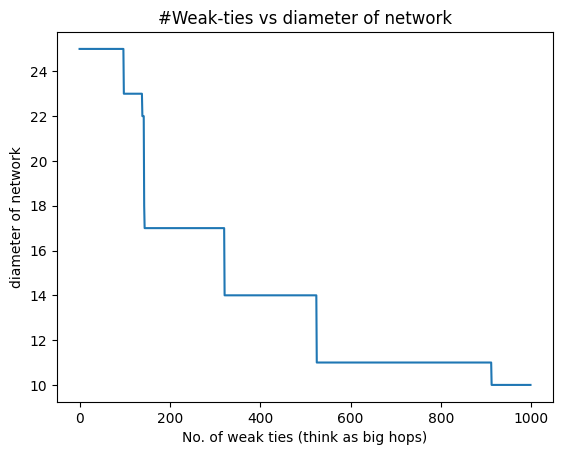

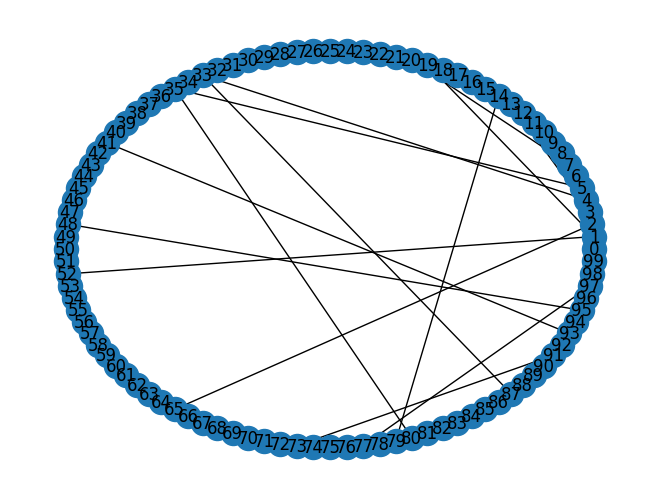

In [11]:
# Import the required libraries..
import networkx as nx            # for working with the graphs
import matplotlib.pyplot as plt  # For visualizing the graph..

# Create a graph..
G = nx.Graph()
# Add some nodes to it..
G.add_nodes_from(range(100))

# -----------HOMOPHILY-------------------
add_homophily_nodes(G)

# Lists for tracking...
x = [0]
y = [nx.diameter(G)]

for i in range(999):#9999
    x.append(i)
    G = add_weak_ties(G, 2)
    y.append(nx.diameter(G))
    
plt.plot(x, y)
plt.xlabel("No. of weak ties (think as big hops)")
plt.ylabel("diameter of network")
plt.title("#Weak-ties vs diameter of network")
plt.show()

# Look at the graph..
nx.draw(G, nx.circular_layout(G), with_labels=True, )
plt.show()



## Module-6: **Programming illustration- Myopic Search : Introduction**

Seen the Small World Network (SWN)<br/>
Now, the **De-Centralized Search** -- i.e., no centralized control<br/>
**How it happens..??**
> Let's start from the **source** (towards the **target** node).
> * The source, finds the distance to all the nodes which are neighbours to it
> * It picks the one having **smallest distance**, and it takes over.., again same story ....................... till the target.<br/>
![](resources/myopic-search_intro.png)

**Why named Myopia..**
> Recollect what's meant by Myopia, from the Physics 9th Std. Recollect.....<br/>
![](resources/nearsightedness-glasses-Myopia-lenses-focus-eye-objects.jpg)<br/>
i.e., **Near - Sightedness**, that's what happening here right..

Consider the basic networkk...<br/>
![](resources/myopic-search-setup.png) Yellow colored: Homophily, and Red: Weak ties -- which made this network, small World network.

Consider **start** as $1$, and **target** to be $6$.
![](resources/working-of-myopic-search.png)<br/>
**How the distance was calculated..??**
> * Neighbours of $1$: `{2, 10, 8}`. 
> * Subtract the **target** from all those. It gives.. `{4, 4, 2}`.
> * Pick the node, which gave smallest **distance**. It's `8` here. So transmitted to `8`. 
> * This story repeats till reaching target `6`.

No. of hops taken are: 3

**Is this search optimal..??** No right, still we have the path of length `2` via, `1 -> 10- > 6`.<br/>
> ![](resources/optimal-plot.png) -- but this **need the global knowledge of the network**.

****
**What's going to be a see in the screen cast is..**
> Ring graphs(networks) having 100, 200, 300,.. 1D small world networks, and going to apply the Decentralized search and going to look at the average plot of it.  <br/>
![](resources/whats-going-to-be-in-the-screencast.png)

## Module-7: **Myopic Search**

In [88]:
def find_nearest_neighbor(G, src, dstn):
    shortest_distance = G.number_of_nodes()    # As atleast distance, in the worst-case...
    nearest_node = 0;                          # To keep track of, which neighbor had the shortest proximity..
    for neighbor in G.neighbors(src):
        calc_shortDistance = len(nx.shortest_path(G, neighbor, dstn))  # Find the shortest path(an array) b/w the src's neighbor and dstn.
        if calc_shortDistance < shortest_distance:           # A filter to get only the shortEST-distance.. out of all short distances
            shortest_distance = calc_shortDistance
            nearest_node = neighbor
    return nearest_node                        # Return the node having, nearest distance to the source...

In [89]:
def myopic_search(G, src, dstn):
    path = [src]
    current = src
    while(current != dstn):             # Loop, as lon current reaches the target...
        nearest_neighbor = find_nearest_neighbor(G, current, dstn)
        current = nearest_neighbor
        path.append(nearest_neighbor)
    return path

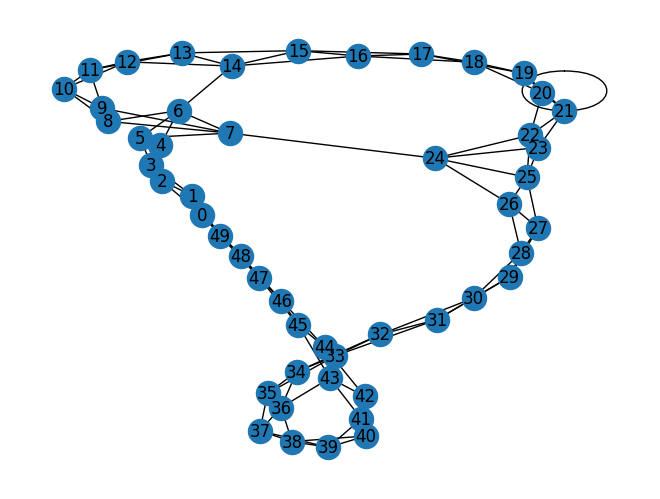

In [93]:
nx.draw(G, with_labels=True)
plt.show()

In [102]:
temp = 40

In [103]:
nx.shortest_path(G, 1, temp)

[1, 49, 47, 45, 43, 41, 40]

In [104]:
myopic_search(G, 1, temp)

[1, 0, 48, 46, 44, 42, 40]

In [72]:
def set_path_colors(G, path1, path2):
    colors = []
    for node in G.nodes():
        if node == path1[0]:
            colors.append('red')
        if node == path1[len(path1)-1]:
            colors.append('red')
        if node in path1 and node in path2 and node !=path1[0] and node != path2[len(path2)-1]:
            colors.append('green')
        if node in path1 and node not in path2:
            colors.append('yellow')
        if node not in path1 and node in path2:
            colors.append('yellow')
        if node not in path1 and node not in path2:
            colors.append('black')
    return colors

In [106]:
# Import the required libraries..
import networkx as nx            # for working with the graphs
import matplotlib.pyplot as plt  # For visualizing the graph..

def main():
    # Create a graph..
    G = nx.Graph()
    # Add some nodes to it..
    num_nodes = int(input("no of nodes = "))
    G.add_nodes_from(range(num_nodes))
    
    # -----------HOMOPHILY-------------------
    add_homophily_nodes(G)
    
    # ----------Weak ties--------------
    x = [0]
    y = [nx.diameter(G)]
    for i in range(10):
        x.append(i)
        G = add_weak_ties(G, 100)
        y.append(nx.diameter(G))
        
    # --------Search-------------
    src = int(input("source node = "))
    dstn = int(input(" destination node = "))
    myopic_path = myopic_search(G, src, dstn)
    optimal_path = nx.shortest_path(G, source=src, target=dstn)
    colors = set_path_colors(G, myopic_path, optimal_path)
    #nx.draw(G,  nx.spectral_layout(G), node_color=colors, with_labels=True)
    nx.draw_networkx(G, nx.spring_layout(G), arrows=True, node_color=colors, node_shape='o', font_family='c059', alpha=0.7, node_size=800, font_color="white")
    plt.show()

    compare_paths(G, num_nodes)
main()

no of nodes =  1000
source node =  20
 destination node =  200


ModuleNotFoundError: No module named 'scipy'

In [19]:
nx.draw_networkx(G, nx.spring_layout(G), arrows=True, node_color=colors, node_shape='o', font_family='c059', alpha=0.6, node_size=800, font_color="white")

NameError: name 'colors' is not defined

In [ ]:
# Create a graph..
G = nx.Graph()
# Add some nodes to it..
num_nodes = int(input("no of nodes = "))
G.add_nodes_from(range(num_nodes))

# -----------HOMOPHILY-------------------
add_homophily_nodes(G)

# ----------Weak ties--------------
x = [0]
y = [nx.diameter(G)]
for i in range(10):
    x.append(i)
    G = add_weak_ties(G, 2)
    y.append(nx.diameter(G))
        

In [ ]:
nx.draw_networkx(G, arrows=True, node_color='red', node_shape='o', font_family='c059', alpha=0.6, node_size=800)
plt.show()

In [ ]:
import networkx as nx
nx.draw_networkx?

## Module-8: **Myopic Search comparision to optimal search**

In [ ]:
asw

![](resources/a-quick-recap.png) -- on this 1D network.

Now, in this lecture... going to take a small world network on 100nodes and put some weak ties(10).<br/>
![](resources/ingredient-1.png)<br/>
Now our aim is going to be... 
* **Compare Myopic search with optimal Search _for various different pairs_**. 
* But which pairs do we choose..?? We want many pairs of src and destination..
.
**How the comparison is going to be..**
> **Difference between the path** taken by myopic search and optimal for each pair.

but, **What would be the best pairs..?**
> The pairs which are diametrically opposite (i.e., along the ring they had the highest distance)<br/>
**Ex:** $0 \& 49$, $1 \& 50$ ....![](resources/aim-of-comparison.png)

**How we are going to do..??**
> ![](resources/what-we-are-going-to-do.png) 
* Will be taking all those pairs and take them on the X-axis.
* On the Y-axis, will be taking the **path-length** of the algorithm for that chosen pair.
    * The _orange colored marker_ --- is of Myopic
    * The _white colored marker_ --- is of Optimal

Let's do it..

In [79]:
def compare_paths(G, num_nodes):
    x = []                  # To store all the tuples of pairs (0, 50), (1, 50)..
    myopic_lengths = []     # To store al the lengths taken by myopic search, for each corresponding pair..
    optimal_lengths = []    # .................................optimal........................................
    
    # Calculate the path-lengths..
    #for (u, v) in zip(range(0, 49+1), range(50, 99+1)):
    v=0
    for u in range(0,num_nodes//2-1):
        v = u+num_nodes//2
        #print("u: ", u)
        #print("v: ", v)
        myopic_lengths.append(len(myopic_search(G, u, v)))
        optimal_lengths.append(len(nx.shortest_path(G, source=u, target=v)))
        x.append(str((u, v)))
    
    print(myopic_lengths)
    print(optimal_lengths)
    
    # Plot it..
    plt.plot(x, myopic_lengths, 'ro-')
    plt.plot(x, optimal_lengths, 'b^-')
    plt.xticks(rotation=90)
    plt.title("Comparing Myopic search and Optimal in-terms of path-lengths")
    plt.xlabel("Pairs as (src, destination)")
    plt.ylabel("Path-lengths for corresponding pair chosen")
    plt.legend(["Myopic search", "Optimal Search"])
    plt.show()

In [84]:
def create_network(num_nodes):
    # Create a graph..
    G = nx.Graph()
    # Add some nodes to it..
    #num_nodes = int(input("no of nodes = "))
    G.add_nodes_from(range(num_nodes))
    
    # -----------HOMOPHILY-------------------
    add_homophily_nodes(G)
    
    # ----------Weak ties--------------
    x = [0]
    y = [nx.diameter(G)]
    for i in range(50):        # 50 tells, the no. of weak ties (ofcourse, the picks happen randomly)
        x.append(i)
        G = add_weak_ties(G, 2)
        y.append(nx.diameter(G))
    
    return G

In [43]:
def search_in_network(do_plot=False):
    # --------Search-------------
    src = int(input("source node = "))
    dstn = int(input(" destination node = "))
    myopic_path = myopic_search(G, src, dstn)
    optimal_path = nx.shortest_path(G, source=src, target=dstn)
    colors = set_path_colors(G, myopic_path, optimal_path)
    if do_plot:
        #nx.draw(G,  nx.spectral_layout(G), node_color=colors, with_labels=True)
        nx.draw_networkx(G, nx.spring_layout(G), arrows=True, node_color=colors, node_shape='o', font_family='c059', alpha=0.7, node_size=800, font_color="white")
        plt.show()

no of nodes =  50


[11, 11, 12, 12, 11, 11, 9, 9, 7, 7, 5, 5, 3, 4, 3, 5, 5, 7, 7, 8, 7, 8, 7, 9]
[11, 11, 12, 12, 11, 11, 9, 9, 7, 7, 5, 5, 3, 4, 3, 5, 5, 7, 7, 8, 7, 8, 7, 9]


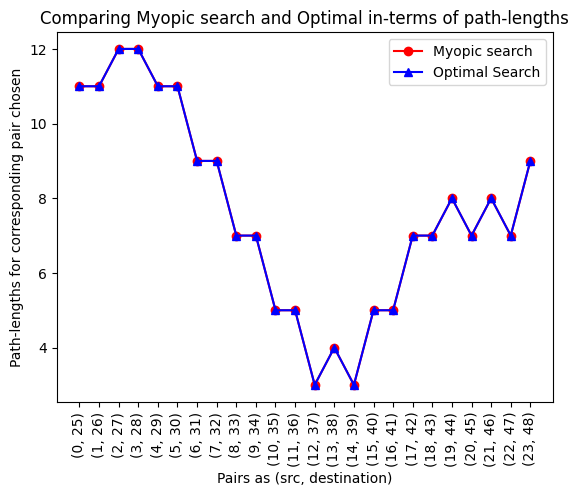

In [86]:
# Import the required libraries..
import networkx as nx            # for working with the graphs
import matplotlib.pyplot as plt  # For visualizing the graph..

def main():
    num_nodes = int(input("no of nodes = "))
    G = create_network(num_nodes)
    #search_in_network();
    
    compare_paths(G, num_nodes)

main()

How the optimal and myopic giving the same path lengths..??

But the actual plot should look like..
![](resources/actual-plot-should-look-like.png)

In [38]:
for each in [(1, 2), (3, 4)]:
    print(str(each))

(1, 2)
(3, 4)


## Module-9: **Time Taken by Myopic Search**

Now, will be looking at the ... **How much does Myopic search takes** for different set sizes of the networks.<br/>
Say, for 100 nodes, for points taken for **diametrically opposite points**..<br/>
![](resources/time-comparison-snapshot1.png) Next for 200 nodes.. ![](resources/time-comparison-snapshot2.png)<br/>

**A care....**<br/>
* Earlier its only 10 weak ties for that network.... (note that for 100 nodes its 10%).
* Now, we should maintain the 10% of weak ties for the given network size..

What we'll be doing..    
* Plotting a graph like..
* where each point tells, for these diametrically sized points, this is the average time
* and interested in knowing, whether, the curve is linear, quadratic, logn...

In [121]:
# logic adopted from "Abhishek Mohite" --- commmented on the lecture's video

def add_homophily_nodes_v1(G):
    n = len(G.nodes())
    for idx in range(len(G.nodes())):
        G.add_edge(idx%n, (idx+1)%n);   #print(idx%n, (idx+1)%n, end=", ")
        G.add_edge(idx%n, (idx+2)%n);   #print((idx+2)%n)
    return G

In [120]:
import random
def add_weak_ties_v1(G, num_iterations):
    for i in range(num_iterations):
        v1 = random.choice(list(G.nodes()))
        v2 = random.choice(list(G.nodes()))
        while v1 == v2 and (v1, v2) not in G.edges() or (v2, v1) not in G.edges():                              # Go, as long as you gethttps://youtu.be/jHgNv8_qhcs the same nodes
            v1 = random.choice(list(G.nodes()))
            v2 = random.choice(list(G.nodes()))
            G.add_edge(v1, v2)                       # If already exists an edge b/w, v1 and v2, this doesn't seems to be affected
    return G

In [123]:
def create_network_v1(num_nodes):
    # Create a graph..
    G = nx.Graph()
    # Add some nodes to it..
    G.add_nodes_from(range(num_nodes))
    
    # -----------HOMOPHILY-------------------
    add_homophily_nodes(G)
    
    # ----------Weak ties--------------
    x = [0]
    y = [nx.diameter(G)]
    for i in range(G.number_of_nodes()//10):        # Adding 10% of weak ties..
        x.append(i)
        G = add_weak_ties(G, 2)
        y.append(nx.diameter(G))
    
    return G

In [118]:
def myopic_timeFinding(G, num_nodes):
    x = []                  # To store all the tuples of pairs (0, 50), (1, 50)..
    myopic_lengths = []     # To store al the lengths taken by myopic search, for each corresponding pair..
    optimal_lengths = []    # .................................optimal........................................
    
    # Calculate the path-lengths..
    #for (u, v) in zip(range(0, 49+1), range(50, 99+1)):
    v=0
    for u in range(0,num_nodes//2-1):
        v = u+num_nodes//2
        myopic_lengths.append(len(myopic_search(G, u, v)))
        #optimal_lengths.append(len(nx.shortest_path(G, source=u, target=v)))
        #x.append(str((u, v)))
        x.append(u)
    
    #print(myopic_lengths)
    #print(optimal_lengths)
    
    return G.number_of_nodes(), np.average(myopic_paths)

In [124]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

def build_diff_sized_SWNs():  # Build diff sized SmallWorldNetworks
    xaxis, yaxis = [], []
    
    tempx, tempy = 0, 0      # temporary variables..
    for size in range(100, 1000+1, 100):
        # Create network..
        create_network_v1(size);
        
        # Get values for different sized search paths..
        tempx, tempy = myopic_timeFinding(G, size)
        xaxis.append(tempx);
        yaxis.append(tempy)
        
        print(tempx, tempy)
        
    # Plot it..
    plt.plot(xaxis, yaxis, 'ro-')
    #plt.plot(x, optimal_lengths, 'b^-')
    plt.xticks(rotation=90)
    plt.title("Comparing Myopic search and Optimal in-terms of path-lengths")
    plt.xlabel("Pairs as (src, destination)")
    plt.ylabel("Path-lengths for corresponding pair chosen")
    plt.legend(["Myopic search", "Optimal Search"])
    plt.show()

In [127]:
build_diff_sized_SWNs()

NodeNotFound: Either source 1 or target 50 is not in G

In [108]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 48), (0, 49), (1, 2), (1, 3), (1, 49), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (6, 14), (7, 8), (7, 9), (7, 24), (8, 9), (8, 10), (9, 10), (9, 11), (10, 11), (10, 12), (11, 12), (11, 13), (12, 13), (12, 14), (13, 14), (13, 15), (14, 15), (14, 16), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (17, 19), (18, 19), (18, 20), (19, 20), (19, 21), (20, 21), (20, 22), (21, 22), (21, 23), (21, 21), (22, 23), (22, 24), (22, 25), (23, 24), (23, 25), (24, 25), (24, 26), (25, 26), (25, 27), (26, 27), (26, 28), (27, 28), (27, 29), (28, 29), (28, 30), (29, 30), (29, 31), (30, 31), (30, 32), (31, 32), (31, 33), (32, 33), (32, 34), (33, 34), (33, 35), (34, 35), (34, 36), (35, 36), (35, 37), (36, 37), (36, 38), (36, 43), (37, 38), (37, 39), (38, 39), (38, 40), (39, 40), (39, 41), (40, 41), (40, 42), (41, 42), (41, 43), (42, 43), (42, 44), (43, 44), (43, 45), (44, 45), (44, 46), (45, 46), (45, 47), (46, 47), (46, 48), (47, 48), (4

Should get like..
![](resources/myopic-search-module-result.png)<br/>
Inference:
* Its linear with a +ve relationship

## Module-10: **Pseudocores: Introduction**

Have a quick glimpse...
* Cascades
    * How people follow..?? -------------- interms of behaviour, idea and product..<br/>
    ![](resources/cascades-recap.png)
    * Epidemics<br/>
    ![](resources/epidemics-recap.png)< --How they spread from person to person, and modellings like SIS and SIR.
    * Subtle difference between **Spread of an Idea** and **Spread of Disease** -- i.e., spread of idea had chance to take or reject, for contagion not. <br/>
    ![](resources/idea-disease-choice.png)

Spreading of idea had a special interest. In internet world, becoming famous is vrey easy compared to earlier time.<br/>
It can be like a photo, video, meme, riot... -- called **Internet meme**.

****
Justin Beiber...<br/>
> In his childhood, he used to sing songs and his parents used to record and post in YouTube. Slowly they gained popularity. Once a producer seen that and invited to singing industry.<br/>
![](resources/justin-beiber-example.png)

## Module-11: **How to be Viral**

![](resources/is-it-easy.png)<br/>
**Then how do we make it popular..??**<br/>
> ![](resources/how-do-we-make-it-popular.png)<br/>
> **1. Novelty of meme**: quality, background music..<br/>
> **2. Structure**: how the network is structured... some make popular fast and some not.<br/>
> **3. Key Nodes**: i.d., Some famous helping out in becoming famous<br/>
    * Ex: Shri Modiji re-tweeting your post, some-body famous people recommending your product... etc...

Novelty of meme: quality, background music..

## Module-12: **Who are the right key nodes?**

Key nodes show some impact, but who are those key nodes..??<br/>
Ok, given a network like this, How do you tell, this is the key node...?? <br/>![](resources/given-a-network.png)<br/>
And there are many many possiblities.. like
* Node having maximum number of friends..?? (or highest degree)
* or a Node which is structurally closer to all the nodes --- (technically called **closness centrality**)<br/>
![](resources/what-options.png)
* or having high in-betweenness -- how good are you in connecting the networks<br/>
![](resources/high-n-betweenness.png)

How.. How..?? a node should be chosen, such that, if chosen that node, and infected with an idea, it becomes viral.

## Module-13: **finding the right key nodes (the core)**

Here goes the answer for the question...<br/>
**Core-Periphery structure**.<br/>
![](resources/core-periphery-structure.png) Idea is: When the idea is informed to any one of the core node, (as it is dense and connected to more nodes) it soon spreads to all the network.
***
Ok, that's fine. If given a core and periphery in a network.<br/>
But, what if given some network and asked to distinct the core and periphery..?<br/>
![](resources/how-do-you-tell-a-core.png)<br/>

An approach..<br/>
<img src="resources/pathway.png" width=20%> A help of a simple math definition..<br/>
**K-Core**: 
> A sub-graph of a graph, having `>=k` degree for every node. Ex: if had `>=2` as degree for every node in a sub-graph its the 2-core.<br/>
![](resources/k-core.png)

Answer..
> ![](resources/answer-to-question.png) -- its fine, for a small network<br/>

But what about the one having (say) billion, million nodes...ex: facebook, youtube..![](resources/many-nodes.png)<br/>
There is an algorithm fo this....its

### **K-Shell Decomposition algorithm**

Consider the below network... For sometime, consider them as Balls.
![](resources/first-look-at-network-example.png) -- the bucket is used to hold all the balls having `1-degree` -- ONLY 1 friend. (Pendent nodes) and place them in the bucket..<br/> 
![1-degree-nodes-out](resources/1-degree-nodes-out.png)
NOTE: When removed a node, all the edges attached to it are also removed. 

<img src="resources/notice.png" width=15%>**Have you noticed something..??**
> When removed an node with degree-1, another node having degree-2, will now become degree-2, right....???<br/>
So, if removed some balls, new balls emerge out of that or less degree.

As per example, now **B** becomes degree-1 after removal of **G**, so place even that in the bucket.<br/>
![](resources/1-degree-nodes-out_1.png)

Repeat the procedure, until you find no ball with degree 1. ie., we remain with balls having >1 only. When achieved that, put the bucket aside.

Now, get the fresh bucket, and label as degree-2_Core.<br/>
![](resources/2-degree-nodes-out.png)<br/>, first removed **C** and **E**, which made **G**, of degree-2, so even made ready to remove.

Now,..  have you noticed one thing, now we also got a ball of degree-1.. Look at **F**. <br/>
**What should one do about it..??** -- in core-1 bucket or core-2 bucket..??
>  in the bucket of core-2. i.e., all the balls of degree <=2, should go to its bucket only. So, it looks like: ![](resources/2-degree-nodes-out_1.png)

For degree-3..<br/>
![](resources/3-degree-nodes-out.png)...

Repeat the process, until no node is left in the network.

but, how can this algorithm give the **Core of the network..??**<br/>
> The last bucket which got filled, is the core. Here its 3rd...![](resources/core-in-the-network.png)

Now, looking at the earlier example....with the **k-shell decomposition**...<br/>
![](resources/earlier-example-with-k-shell-decomposition.png)

<img src="resources/warning.png" width=20%> Recollect the definition of the **K-core**. 
> the nodes which are having **`>=`** k belongs to **K-core**.
****
Hence, for the K-shell decomposition algorithm..<br/>
![what-a-core-is-in-k-shell-decomposition](resources/what-a-core-is-in-k-shell-decomposition.png) Generalizing it becomes...![](resources/what-a-core-is-in-k-shell-decomposition-generalization.png)

i..e, if need 1 core, we can't take it simply that bucket, need to take all the higher buckets.  

<img src="resources/observe.png" width=20%>Have you observed,..??
> To get any one of the core, one needs to calculate all the cores.
****
How..?? 
* Say if needed the lowest degree one (say, 1), then for that need to calculate all the higher ones right..
* If of any node's degree >=1 or the highest one for the case, need to calculate the below ones to arrive at there right..??.

## Module-13: **Coding K-Shell Decomposition**

Look at the example, and try solving it...
![](resources/another-example.png)<br/>
Solution:
![](resources/solution-to-the-answer.png)

How do we write code for it... before getting into it, lets look at the structure..

* **buckets**: list of lists, each corresponding to a bucket of spefific degree.
* **it**: at any instant of the code, it holds, which degree nodes are being removed.
* **temp**:it holds one bucket at one time (temporarily)
    * It is filled as long as there are some elements with that degree, and when the point reached, where there are no more nodes of degree `<=k` and appended to the **`Buckets`**

Flowchart of the algorithm..<br/>
![](resources/algorithm-flow-chart.png)

In [10]:
def check_degree_existence(G, degree):
    group = []
    for node in G.nodes():
        if G.degree(node) <= degree:
            group.append(node)              # When  found a node with matching criteria, send that node..
    return group if len(group) != 0 else False                            # Send false, when couldn't able to find a node having degree<= passed_degree

In [11]:
def find_max_degree(G):
    max_degree=0
    for node in G.nodes():
        if max_degree < G.degree(node):
            max_degree = G.degree(node)
    
    return max_degree

In [16]:
def k_shell_decomposition(G):
    buckets    = []
    tmp_bucket = []  # temp
    curr_degree= 1   # it
    max_degree = find_max_degree(G)
    tmp_node   = -1
    
    while(G.number_of_nodes() >= 1):      # Run, as long as there are some nodes in the graph..
        #if curr_degree <= max_degree:        -- this condition doesn't matter
        group = check_degree_existence (G, curr_degree)
        if group != False:   # If found a node meeting <= degree..
            for node in group:
                G.remove_node(node)       # Prune the node
                tmp_bucket.append(node)   # Add it to working bucket..

        else:                              # When no such nodes found matching the crteria.. by now the working bucket would have got filled...
            buckets.append(tmp_bucket)        # Store the filled bucket
            tmp_bucket = []                   # Set it back to empty, as to hold new nodes 
            curr_degree += 1                  # As done with the a degree, its time to go for next degree.
    else:                                      # When control comes here, tmp_bucket still holds some nodes which are to be stored..
        buckets.append(tmp_bucket)                # Store it
                
    return buckets
                

A Modal network..
![](resources/model-network.png)

[[1, 3, 4, 6, 7, 8, 9, 17, 2, 5], [12, 11, 10], [13, 14, 15, 16]]


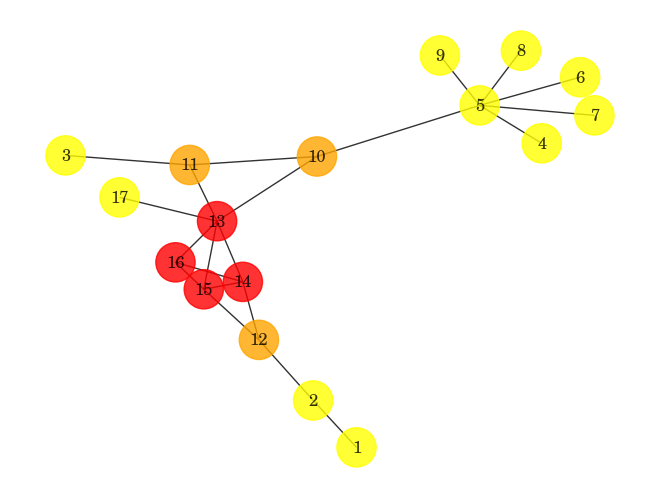

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()   # Create a graph..
G.add_edges_from([(1, 2), (2, 12), (3, 11), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (10, 11), (10, 13), (11, 13), (12, 14), (12, 15), (13, 14), (13, 15), (13, 16), (13, 17), (14, 15), (14, 16), (15, 16)])

H = G.copy()
shells = k_shell_decomposition(G)
print(shells)
colors = []

for node in H.nodes():
    if node in shells[0]:
        colors.append('yellow')
    elif node in shells[1]:
        colors.append('orange')
    else:
        colors.append('red')

nx.draw(H, with_labels=True, node_color=colors, node_size=800, alpha=0.8, font_family="c059")
plt.show()
#print(k_shell_decomposition(G))

![](resources/their_code_1.png)![](resources/their_code_2.png)
![](resources/their_code_3.png)![](resources/final_result.png)

## Module-14: **Coding cascading Model**

Our next aim: **finding the influential pair of nodes**

https://youtu.be/jHgNv8_qhcshttps://youtu.be/jHgNv8_qhcshttps://youtu.be/jHgNv8_qhcshttps://youtu.be/jHgNv8_qhcshttps://youtu.be/jHgNv8_qhcs

If it was of:
* with more technical terms and critical concepts --- go verbatim way
* For simple conceptual based, just take-down the key-ideas  and catching examples.